In [1]:
import utils 
from constants import DATA_PATH 
import scipy.io as sio
import numpy as np 
from scipy.spatial.distance import cosine
from itertools import combinations
import algos 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 

In [4]:
data = sio.loadmat(DATA_PATH / '9ContactsMatrix.mat')
print(data.keys()) 
arr = data['JGQ']
print("Shape of input array: ", arr.shape)
print("*"*20) 

print("Greedy approach: ") 
greedy_vol, greedy_indices = algos.greedy_approach(arr, num_entries=26) 
print(f"Max volume: {greedy_vol}")
print(f"Selected Indices: {greedy_indices}")
print("*"*20) 

print("Max radial coordinate approach: ")
max_rad_vol, max_rad_indices, rad_labels = algos.max_radial_coors_approach(arr, num_entries=26, seed=0) 
print(f"Max volume: {max_rad_vol}")
print(f"Selected Indices: {max_rad_indices}")
print("*"*20) 

dict_keys(['__header__', '__version__', '__globals__', 'JGQ'])
Shape of input array:  (378, 26)
********************
Greedy approach: 
Max volume: 5.4476519139258094e-34
Selected Indices: [22, 28, 36, 66, 86, 115, 131, 135, 157, 163, 181, 182, 202, 211, 226, 237, 257, 267, 279, 320, 331, 343, 357, 370, 373, 375]
********************
Max radial coordinate approach: 
Shape of angular coordinates (378, 25)
Cluster distribution:  {0: 17, 1: 23, 2: 16, 3: 14, 4: 17, 5: 13, 6: 19, 7: 16, 8: 13, 9: 12, 10: 11, 11: 10, 12: 20, 13: 10, 14: 13, 15: 16, 16: 6, 17: 17, 18: 7, 19: 16, 20: 18, 21: 9, 22: 15, 23: 18, 24: 19, 25: 13}
Max volume: 1.6341018910170925e-36
Selected Indices: [64, 89, 126, 131, 132, 137, 141, 145, 150, 165, 167, 174, 178, 179, 181, 186, 194, 196, 209, 218, 224, 226, 237, 242, 249, 344]
********************


Cluster Distribution: {0: 6, 1: 15, 2: 13, 3: 12, 4: 21, 5: 13, 6: 25, 7: 53, 8: 11, 9: 6, 10: 7, 11: 12, 12: 15, 13: 16, 14: 14, 15: 13, 16: 6, 17: 4, 18: 15, 19: 6, 20: 21, 21: 5, 22: 6, 23: 9, 24: 38, 25: 16}
Number of clusters:  (26,)
PCA Shape (378, 2)


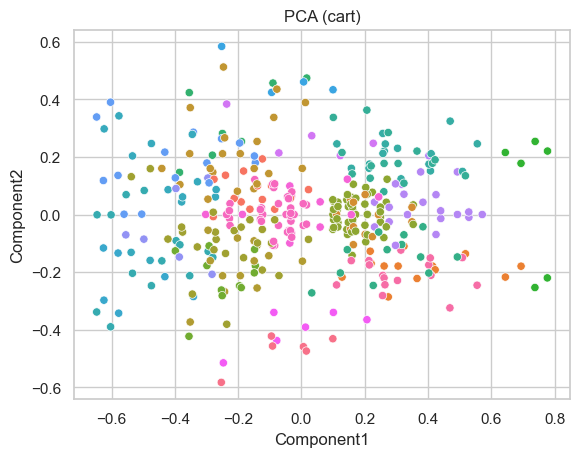

In [5]:
# Perform clustering 
kmeans = KMeans(n_clusters=26, n_init='auto', random_state=0).fit(arr)
cluster_centers = kmeans.cluster_centers_
labels = kmeans.labels_
unique, counts = np.unique(labels, return_counts=True)
clust_dist = dict(zip(unique, counts))
print(f"Cluster Distribution: {clust_dist}")

# Visualize the data in 2-d 
# PCA with 2 components 
print("Number of clusters: ", np.unique(labels).shape)
utils.plot_pca(arr, labels, num_components=2, metric='PCA (cart)')

PCA Shape (378, 2)


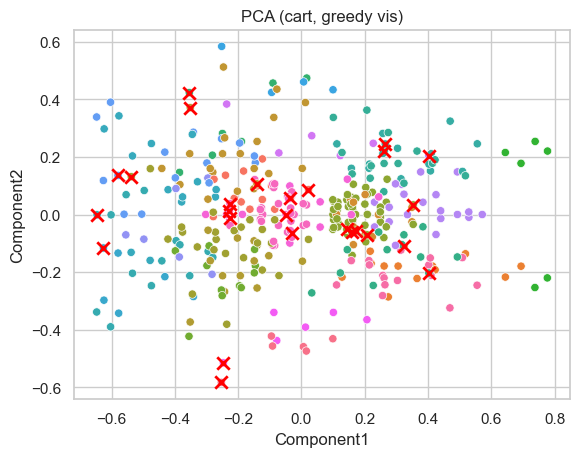

In [6]:
utils.plot_pca(arr, labels, num_components=2, metric='PCA (cart, greedy vis)', selected_indices=greedy_indices)

PCA Shape (378, 2)


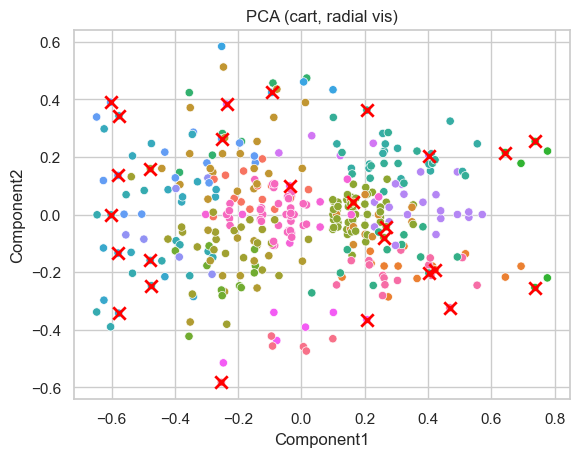

In [7]:
utils.plot_pca(arr, labels, num_components=2, metric='PCA (cart, radial vis)', selected_indices=max_rad_indices)

In [8]:
r, thetas = utils.cartesian_to_nsphere(arr) 
print("Shape of angular coordinates", thetas.shape)

Shape of angular coordinates (378, 25)


PCA Shape (378, 2)


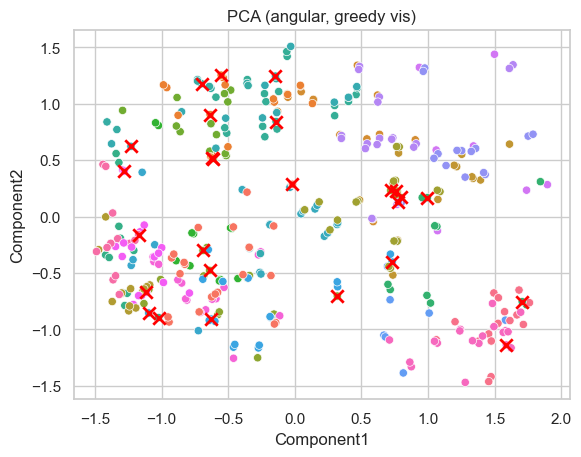

In [9]:
utils.plot_pca(thetas, rad_labels, num_components=2, metric='PCA (angular, greedy vis)', selected_indices=greedy_indices)

PCA Shape (378, 2)


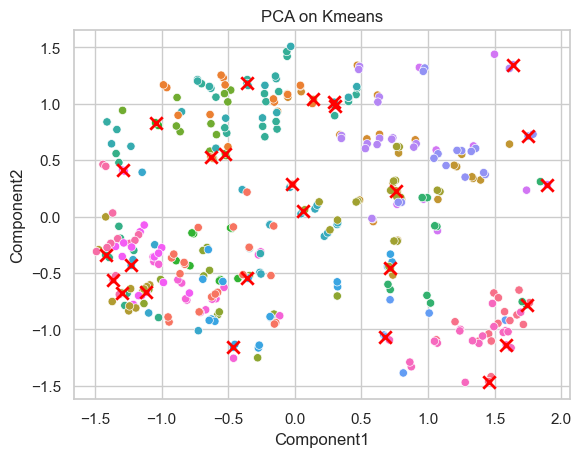

In [16]:
utils.plot_pca(thetas, rad_labels, num_components=2, metric='PCA (angular, greedy vis)', selected_indices=max_rad_indices)